In [1]:
get_ipython().run_cell_magic('capture', '', "%logstop\n%logstart -t -r -q ipython_command_log.py global\n\n#- IRONHACKS RESEARCH TRACKING CODE\n#----------------------------------\n# The following code is used to help our research team understand how you \n# our notebook environment. We do not collect any personal information with\n# the following code, it is used to measure when and how often you work on\n# your submission files.\n\nimport os\nfrom datetime import datetime\nimport IPython.core.history as history\n\nha = history.HistoryAccessor()\nha_tail = ha.get_tail(1)\nha_cmd = next(ha_tail)\nsession_id = str(ha_cmd[0])\ncommand_id = str(ha_cmd[1])\ntimestamp = datetime.utcnow().isoformat()\nhistory_line = ','.join([session_id, command_id, timestamp]) + '\\n'\nlogfile = open(os.environ['HOME']+'/ipython_session_log.csv', 'a')\nlogfile.write(history_line)\nlogfile.close()\n")

In [2]:
get_ipython().run_cell_magic('capture', '', "\n#- INSTALL ADDITIONAL LIBRARIES IF REQUIRED\n#------------------------------------------\n# This is normally not required. The hub environment comes preinstaled with \n# many packages that you can already use without setup. In case there is some\n# other library you would like to use that isn't on the list you run this command\n# once to install them.  If it is already installed this command has no effect.\n\n!python3 -m pip install pandas db-dtypes\n")

- IMPORT THE LIBRARIES YOU WILL USE
------------------------------------------
You only need to import packages one time per notebook session. To keep your
notebook clean and organized you can handle all imports at the top of your file.
The following are included for example purposed, feel free to modify or delete 
anything in this section.

In [3]:
import csv
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

- DEFINE YOUR CLASSES AND FUNCTIONS 
-----------------------------------
This is not required, but is helpful in keeping your notebook organized. 
You can use the following cell or several cells to define your functions
and classes to keep them separate from your analysis or results code.
In general it useful to define your methods in a separate cell from where
it is run.

In [4]:
def example_function():
    print('Hello World')

In [5]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [6]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [7]:
query_job = bigquery_client.query(query)
unemployment_data = query_job.to_dataframe()
print(unemployment_data)

                                  uu_id  timeperiod  week_number  countyfips  \
0      f013068de98db1470bd986137a0c6d23    20220416           16       18003   
1      21957d5517323845818d87623589e1ba    20220319           12       18089   
2      6a5609f385912113b6f1014b958ed748    20220326           13       18089   
3      46b2882ec4c373527ec33f7bd4f1388d    20220716           29       18089   
4      37495d17e82f7df326bfc2c4c090f7b7    20220409           15       18089   
...                                 ...         ...          ...         ...   
16828  f35320206f3dd1ffc411e4ac127caf92    20220618           25       18163   
16829  f35320206f3dd1ffc411e4ac127caf92    20220827           35       18163   
16830  f35320206f3dd1ffc411e4ac127caf92    20220827           35       18163   
16831  bbcb018f0e5e49e13636f6e78ce9f60f    20220326           13       18163   
16832  bbcb018f0e5e49e13636f6e78ce9f60f    20220416           16       18163   

       tract                           

In [8]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.wage_data`
"""

In [9]:
query_job = bigquery_client.query(query)
wage_data = query_job.to_dataframe()
print(wage_data)

                                uu_id  countyfips   tract  \
0    585f8731c2255d6b3f817a31180848b9       18177     200   
1    8c9d2aa90948679972a9382aadcc6001       18177     900   
2    0f3d45341a5b113b813ffb7be7f58bab       18183   50300   
3    fb55464f8e34af6d750d06968bf719b8       18183   50400   
4    983badfd7b568728e39a2344a9006078       18001   30200   
..                                ...         ...     ...   
520  4a6ae3b5be1b9b7c10c177e1b9fded82       18169  102800   
521  e0e676badd59e9b1f2ecf853d2ca1ecb       18173   30500   
522  4338a76c28b57d89da8a28cf06adcf73       18173   30600   
523  3224483a60925de51923d51b10a00141       18173   30800   
524  7b67eb2512a721025efe5cb967a38aff       18173   30400   

                                    tract_name  average_wage  
0        Census Tract 2, Wayne County, Indiana   6612.000000  
1        Census Tract 9, Wayne County, Indiana   9883.250000  
2    Census Tract 503, Whitley County, Indiana  13992.250000  
3    Census Tra

In [10]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.prediction_list`
"""

In [11]:
query_job = bigquery_client.query(query)
prediction_list = query_job.to_dataframe()
print(prediction_list)

                                uu_id  week_number
0    5bf51fc2e162d6faf9e3cf79e4198378           44
1    420b44cc7e3f55d738df565421e59941           44
2    e39c66ecceec76ee8f9f811fa4a2d246           44
3    a90462cd11ae4e43144239bf7c4828a4           44
4    8b20a6749088c7ff1237983076ebfeaa           44
..                                ...          ...
520  46c4f6c75e663b1ca82ea7994e6d83d3           44
521  1deebda501712e7595b531b8337bc31a           44
522  5a9758f65f001b6432ff31ff64a459d7           44
523  e8b3b95e93a6dc7dbb90f4e72e7ac065           44
524  932a58530abff8a48558e2a15639d453           44

[525 rows x 2 columns]


In [12]:
len(pd.unique(unemployment_data["uu_id"]))

525

In [13]:
print(unemployment_data.loc[0])

uu_id                          f013068de98db1470bd986137a0c6d23
timeperiod                                             20220416
week_number                                                  16
countyfips                                                18003
tract                                                       900
tract_name                Census Tract 9, Allen County, Indiana
total_claims                                                 22
edu_8th_or_less                                               0
edu_grades_9_11                                            <NA>
edu_hs_grad_equiv                                            14
edu_post_hs                                                <NA>
edu_unknown                                                   0
top_category_employer1                                    31-33
top_category_employer2                                       51
top_category_employer3                                       62
gender_female                           

In [14]:
# remove unnecessary colomns and combine unemployment data together with wages
unemployment_sample = unemployment_data.copy()
unemployment_sample = unemployment_sample.drop(['timeperiod', 'tract', 'tract_name', 'edu_8th_or_less', 'edu_grades_9_11', 'edu_hs_grad_equiv', 'edu_post_hs',\
                                               'edu_unknown', 'top_category_employer1', 'top_category_employer2', 'top_category_employer3', 'gender_female', 'gender_male',\
                                                'gender_na', 'race_amerindian', 'race_asian', 'race_black', 'race_noanswer', 'race_hawaiiannative',\
                                               'race_other', 'race_white'], axis=1)
wage_sample = wage_data.copy()
wage_sample.drop(['tract', 'tract_name'], axis=1)
prediction_sample = prediction_list.copy()
wages_dict = {i:wage_sample["average_wage"].values[k] for k,i in enumerate(wage_sample["uu_id"])}
wage_list = [wages_dict[i]  for i in unemployment_sample["uu_id"]]
# print(wages_dict)
unemployment_sample["average_wage"] = wage_list

In [15]:
tract_dic = {i:k for k,i in enumerate(wage_sample["uu_id"])}

In [16]:
unemployment_sample["uu_id"] = [tract_dic[i] for i in unemployment_sample["uu_id"]]

In [17]:
print(unemployment_sample.loc[1])

uu_id                 236.0
week_number            12.0
countyfips          18089.0
total_claims          111.0
average_wage    7036.636364
Name: 1, dtype: Float64


In [18]:
X = unemployment_sample.drop(["total_claims"], axis=1).to_numpy() #to_numpy() values
y = unemployment_sample['total_claims'].to_numpy()   #to_numpy() values
# print(X.shape,y.shape)

In [19]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

In [22]:
X = unemployment_sample.drop(["total_claims"], axis=1).to_numpy() #to_numpy() values
y = unemployment_sample['total_claims'].to_numpy()   #to_numpy() values
# print(X.shape,y.shape)

In [23]:
print(X)

[[8 16 18003 8347.125]
 [236 12 18089 7036.636363636364]
 [243 13 18089 7890.142857142857]
 ...
 [502 35 18163 13163.083333333334]
 [509 13 18163 10040.111111111111]
 [509 16 18163 10040.111111111111]]


In [24]:
print(y)

[22 111 39 ... 22 53 24]


In [25]:
print(X)

[[8 16 18003 8347.125]
 [236 12 18089 7036.636363636364]
 [243 13 18089 7890.142857142857]
 ...
 [502 35 18163 13163.083333333334]
 [509 13 18163 10040.111111111111]
 [509 16 18163 10040.111111111111]]


In [26]:
for k,i in enumerate(X):
    if np.nan in i:
        print(k,i)

In [27]:
for k,i in enumerate(X):
    if np.int in i:
        print(k,i)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_16917/3468756.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.int in i:


In [28]:
for k,i in enumerate(X):
    if pd.nan in i:
        print(k,i)

AttributeError: module 'pandas' has no attribute 'nan'

In [29]:
for k,i in enumerate(X):
    for j in i:
        if pd.isna(j)
            print(k,i)

SyntaxError: invalid syntax (397597801.py, line 3)

In [30]:
for k,i in enumerate(X):
    for j in i:
        if pd.isna(j):
            print(k,i)

In [31]:
for k,i in enumerate(wage_list):
    if pd.isna(i):
        print(k,i)
    # for j in i:
    #     if pd.isna(j):
    #         print(k,i)

In [32]:
# remove unnecessary colomns and combine unemployment data together with wages
unemployment_sample = unemployment_data.copy()
unemployment_sample = unemployment_sample.drop(['timeperiod', 'tract', 'tract_name', 'edu_8th_or_less', 'edu_grades_9_11', 'edu_hs_grad_equiv', 'edu_post_hs',\
                                               'edu_unknown', 'top_category_employer1', 'top_category_employer2', 'top_category_employer3', 'gender_female', 'gender_male',\
                                                'gender_na', 'race_amerindian', 'race_asian', 'race_black', 'race_noanswer', 'race_hawaiiannative',\
                                               'race_other', 'race_white'], axis=1)
wage_sample = wage_data.copy()
wage_sample.drop(['tract', 'tract_name'], axis=1)
prediction_sample = prediction_list.copy()
wages_dict = {i:wage_sample["average_wage"].values[k] for k,i in enumerate(wage_sample["uu_id"])}
wage_list = [wages_dict[i]  for i in unemployment_sample["uu_id"]]
# print(wages_dict)
unemployment_sample["average_wage"] = wage_list

In [33]:
tract_dic = {i:k for k,i in enumerate(wage_sample["uu_id"])}

In [34]:
unemployment_sample["uu_id"] = [tract_dic[i] for i in unemployment_sample["uu_id"]]

In [35]:
unemployment_sample = unemployment_sample.dropna()

In [36]:
print(unemployment_sample.loc[1])

uu_id                 236.0
week_number            12.0
countyfips          18089.0
total_claims          111.0
average_wage    7036.636364
Name: 1, dtype: Float64


In [37]:
X = unemployment_sample.drop(["total_claims"], axis=1).to_numpy() #to_numpy() values
y = unemployment_sample['total_claims'].to_numpy()   #to_numpy() values
# print(X.shape,y.shape)

In [38]:
for k,i in enumerate(wage_list):
    if pd.isna(i):
        print(k,i)
    # for j in i:
    #     if pd.isna(j):
    #         print(k,i)

In [39]:
for k,i in enumerate(X):
    for j in i:
        if pd.isna(j):
            print(k,i)

In [40]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

In [43]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [44]:
#To retrieve the intercept:
print(regressor.intercept_)

465.96753093227784


In [45]:
#For retrieving the slope:
print(regressor.coef_)

[ 0.00501859 -0.06887925 -0.02433251 -0.00023549]


In [46]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,45,22.676140
1,10,22.628223
2,16,24.366439
3,13,22.294855
4,44,23.213586
...,...,...
3362,14,23.931541
3363,11,21.391625
3364,50,22.503098
3365,28,22.471390


In [47]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,45,22.676140
1,10,22.628223
2,16,24.366439
3,13,22.294855
4,44,23.213586
...,...,...
3362,14,23.931541
3363,11,21.391625
3364,50,22.503098
3365,28,22.471390


NameError: name 'plt' is not defined

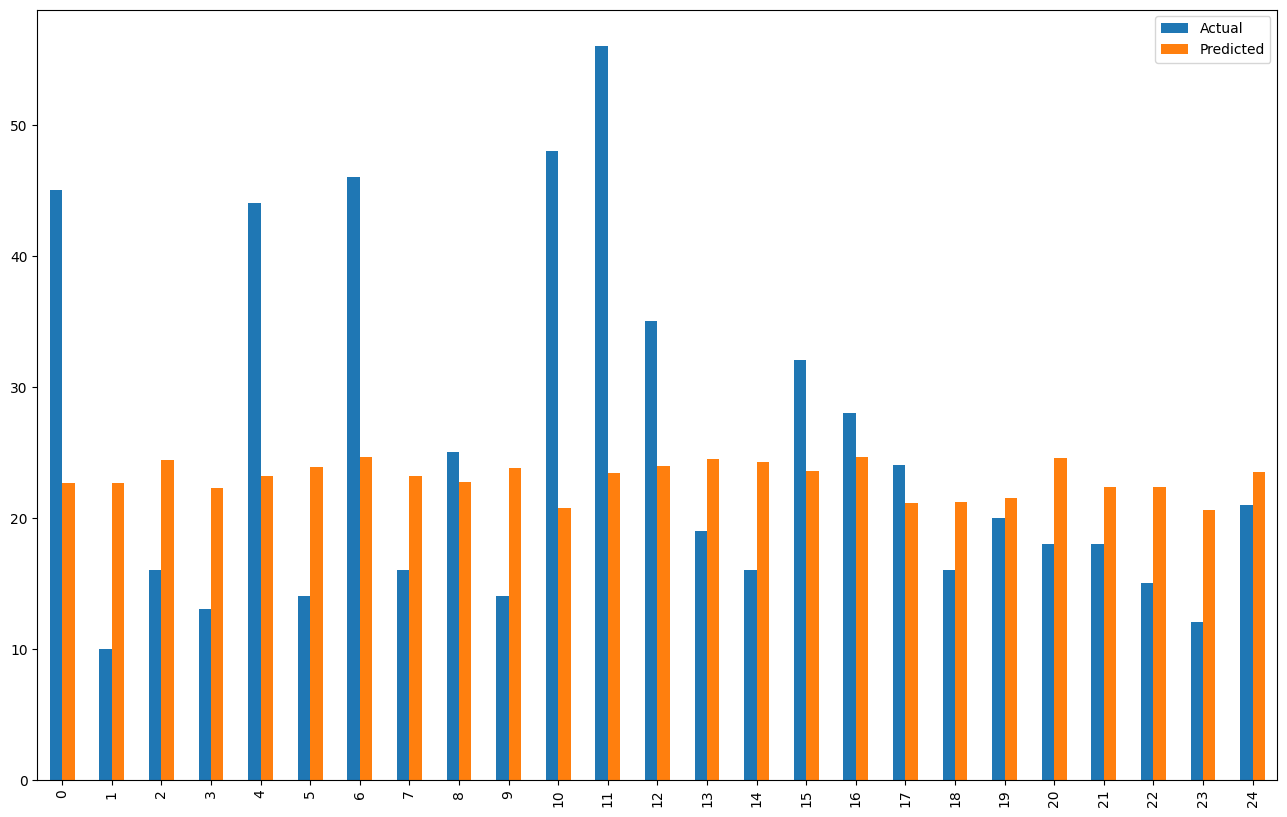

In [48]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [49]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt 

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [52]:
#To retrieve the intercept:
print(regressor.intercept_)

465.96753093227784


In [53]:
#For retrieving the slope:
print(regressor.coef_)

[ 0.00501859 -0.06887925 -0.02433251 -0.00023549]


In [54]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,45,22.676140
1,10,22.628223
2,16,24.366439
3,13,22.294855
4,44,23.213586
...,...,...
3362,14,23.931541
3363,11,21.391625
3364,50,22.503098
3365,28,22.471390


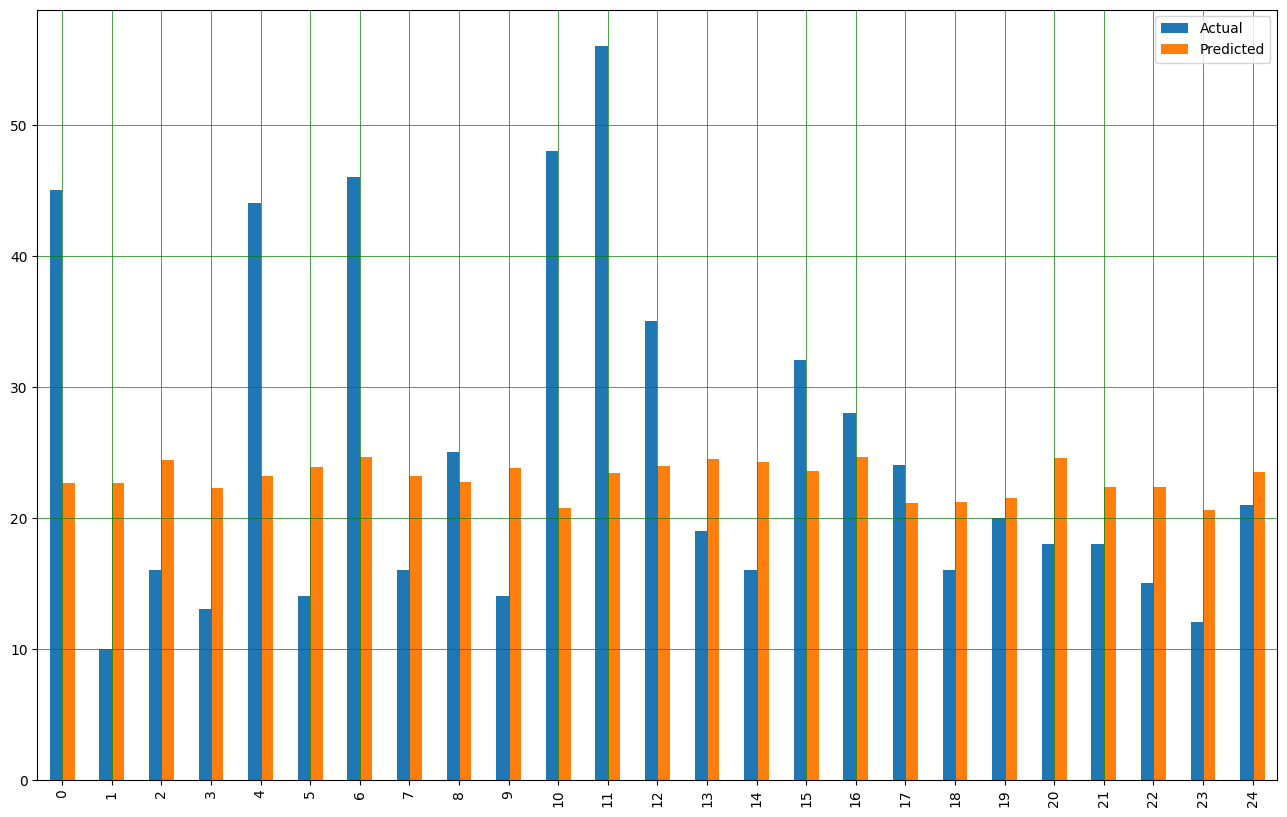

In [55]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [56]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,45,22.676140
1,10,22.628223
2,16,24.366439
3,13,22.294855
4,44,23.213586
...,...,...
3362,14,23.931541
3363,11,21.391625
3364,50,22.503098
3365,28,22.471390


ValueError: x and y must be the same size

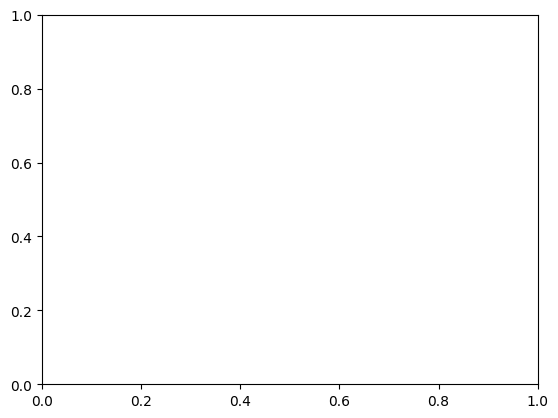

In [57]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [58]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.043081761171448
Mean Squared Error: 214.61790167297136
Root Mean Squared Error: 14.649843059670344


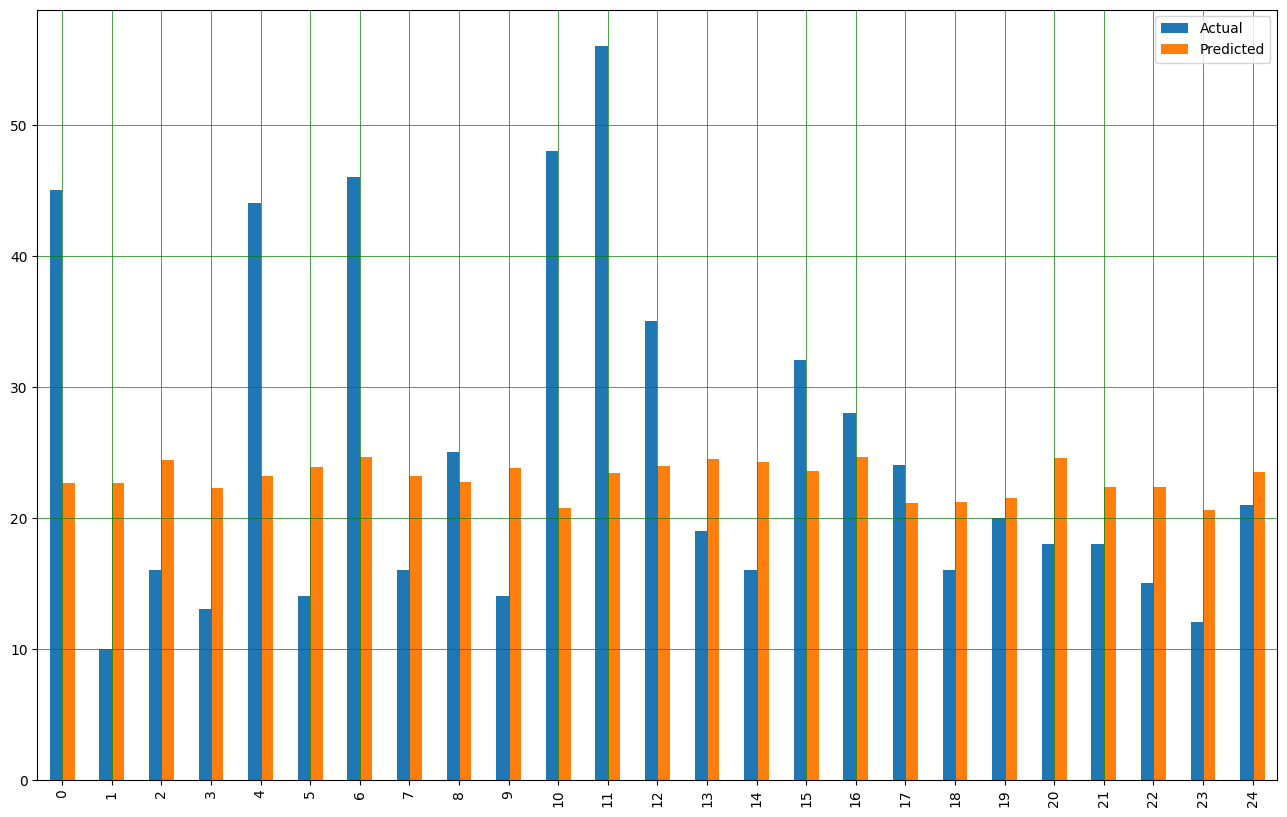

In [59]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()